In [189]:
%matplotlib inline
import numpy as np
import tensorflow as tf
with np.load("notMNIST.npz") as data:
    images, labels = data["images"], data["labels"]
from matplotlib import pyplot as plt

# Change labels into correct format
labels_temp = []
for label in labels:
    temp = np.zeros(10)
    temp[label[0]] = 1
    labels_temp.append(temp)
labels = np.array(labels_temp)

# Normalize images
images = images / 255.0
images = images.reshape(28*28, 18720).T

training_set = images[0:15000]
training_labels = labels[0:15000]
validation_set = images[15000:16000]
validation_labels = labels[15000:16000]
testing_set = images[16000:]
testing_labels = labels[16000:]

(15000, 784)


973.000068665


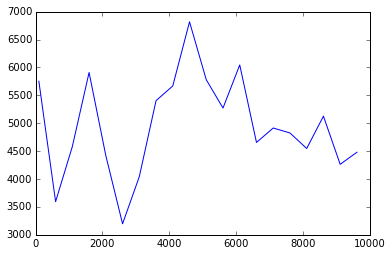

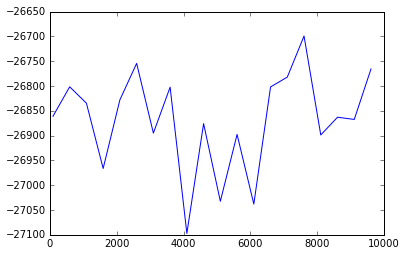

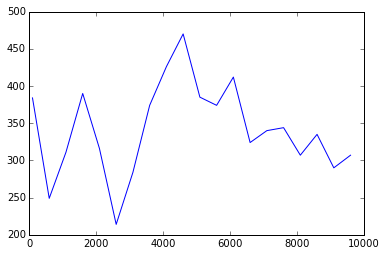

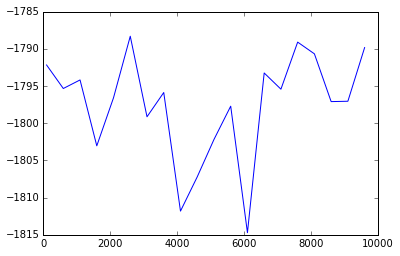

In [207]:
def task1_run(data, labels, val_data, val_labels, num_epochs=1000):
    X = tf.placeholder("float", shape=(None, 28*28))
    Y = tf.placeholder("float", shape=(None, 10))

    W = tf.Variable(np.random.randn(28*28, 10).astype("float32"), name="weight")
    W = tf.Variable(tf.zeros([784, 10]))
    b = tf.Variable(np.random.randn(10).astype("float32"), name="bias")
    b = tf.Variable(tf.zeros([10]))


    probability = tf.nn.softmax(tf.matmul(X, W) + b)
    cross_entropy = -tf.reduce_sum(Y * tf.log(probability))

    train_step = tf.train.MomentumOptimizer(0.0001, 0.5).minimize(cross_entropy)
    init = tf.initialize_all_variables()

    sess = tf.Session()
    sess.run(init)

    num_of_input = data.shape[0]
    batch_size = 1

    for i in range(1000):
        random_data_point = np.random.randint(num_of_input, size=1)
        batch_xs = data[random_data_point]
        batch_labels = labels[random_data_point]
        sess.run(train_step, feed_dict={X: batch_xs, Y: batch_labels})

    correct_prediction = tf.equal(tf.argmax(probability,1), tf.argmax(Y,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    # print sess.run(accuracy, feed_dict={X: data , Y: labels})
    num_errors = data.shape[0] * (1.0 - sess.run(accuracy, feed_dict={X: data , Y: labels}))
    log_likelihood = -1*sess.run(cross_entropy, feed_dict={X: data, Y: labels})
    val_num_errors = val_data.shape[0] * (1.0 - sess.run(accuracy, feed_dict={X: val_data , Y: val_labels}))
    val_log_likelihood = -1*sess.run(cross_entropy, feed_dict={X: val_data, Y: val_labels})
    return (num_errors, log_likelihood, val_num_errors, val_log_likelihood)

epochs = range(100, 10000, 500)
training_err = []
training_LL = []
validation_err = []
validation_LL = []
for i in epochs:
    (err1, ll1, err2, ll2) = task1_run(training_set, training_labels, validation_set, validation_labels, i)
    training_err.append(err1)
    training_LL.append(ll1)
    validation_err.append(err2)
    validation_LL.append(ll2)

plt.figure()
plt.plot(epochs, training_err)
plt.figure()
plt.plot(epochs, training_LL)
plt.figure()
plt.plot(epochs, validation_err)
plt.figure()
plt.plot(epochs, validation_LL)


# Find time to stop
epoch_with_min_error = epochs[np.argmin(validation_err)]
(__, __, test_err, __) = task1_run(training_set, training_labels, testing_set, testing_labels, epoch_with_min_error)
print test_err


In [ ]:
batch_size = 16
patch_size = 5
depth = 16
num_hidden = 64

graph = tf.Graph()

with graph.as_default():
    
    # Input data.
    tf_train_dataset = tf.placeholder(
        tf.float32, shape=(batch_size, image_size, image_size, num_channels))
    tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
    tf_valid_dataset = tf.constant(valid_dataset)
    tf_test_dataset = tf.constant(test_dataset)
  
    # Variables.
    layer1_weights = tf.Variable(tf.truncated_normal(
        [patch_size, patch_size, num_channels, depth], stddev=0.1))
    layer1_biases = tf.Variable(tf.zeros([depth]))
    layer2_weights = tf.Variable(tf.truncated_normal(
        [patch_size, patch_size, depth, depth], stddev=0.1))
    layer2_biases = tf.Variable(tf.constant(1.0, shape=[depth]))
    layer3_weights = tf.Variable(tf.truncated_normal(
        [image_size // 4 * image_size // 4 * depth, num_hidden], stddev=0.1))
    layer3_biases = tf.Variable(tf.constant(1.0, shape=[num_hidden]))
    layer4_weights = tf.Variable(tf.truncated_normal(
        [num_hidden, num_labels], stddev=0.1))
    layer4_biases = tf.Variable(tf.constant(1.0, shape=[num_labels]))
  
    # Model.
    def model(data):
        conv = tf.nn.conv2d(data, layer1_weights, [1, 2, 2, 1], padding='SAME')
        hidden = tf.nn.relu(conv + layer1_biases)
        conv = tf.nn.conv2d(hidden, layer2_weights, [1, 2, 2, 1], padding='SAME')
        hidden = tf.nn.relu(conv + layer2_biases)
        shape = hidden.get_shape().as_list()
        reshape = tf.reshape(hidden, [shape[0], shape[1] * shape[2] * shape[3]])
        hidden = tf.nn.relu(tf.matmul(reshape, layer3_weights) + layer3_biases)
        return tf.matmul(hidden, layer4_weights) + layer4_biases
  
    # Training computation.
    logits = model(tf_train_dataset)
    loss = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(logits, tf_train_labels))
    
    # Optimizer.
    optimizer = tf.train.GradientDescentOptimizer(0.05).minimize(loss)
  
    # Predictions for the training, validation, and test data.
    train_prediction = tf.nn.softmax(logits)
    valid_prediction = tf.nn.softmax(model(tf_valid_dataset))
    test_prediction = tf.nn.softmax(model(tf_test_dataset))



0.100133


In [62]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [126]:
batch_xs, batch_ys = mnist.train.next_batch(100)
#print batch_xs[0]
print training_set / 255.0

[[[ 0.6745098   0.59607843  0.         ...,  0.56862745  0.          0.        ]
  [ 1.          0.96470588  0.         ...,  0.96862745  0.          0.        ]
  [ 0.97254902  1.          0.00784314 ...,  1.          0.          0.        ]
  ..., 
  [ 1.          1.          0.         ...,  0.          0.01176471
    0.01176471]
  [ 1.          0.96470588  0.         ...,  0.          0.39215686  0.        ]
  [ 1.          0.59607843  0.         ...,  0.          0.31764706  0.        ]]

 [[ 0.71372549  0.          0.         ...,  0.          0.          0.        ]
  [ 1.          0.12156863  0.00392157 ...,  0.39215686  0.          0.        ]
  [ 0.99215686  0.32941176  0.         ...,  1.          0.          0.        ]
  ..., 
  [ 1.          0.32941176  0.35294118 ...,  0.          0.83529412  0.        ]
  [ 1.          0.12156863  0.46666667 ...,  0.          1.          0.01176471]
  [ 1.          0.          0.11372549 ...,  0.          0.61568627  0.        ]]

 [[ 0